## 유니코드 기반으로 filtering

1. 유니코드란?
> 유니코드(Unicode)는 전 세계의 모든 문자를 컴퓨터에서 일관되게 표현하고 다룰 수 있도록 설계된 산업 표준이며, 유니코드 협회(Unicode Consortium)가 제정한다. 또한 이 표준에는 ISO 10646 문자 집합, 문자 인코딩, 문자 정보 데이터베이스, 문자들을 다루기 위한 알고리즘 등을 포함하고 있다. - 위키피디아 -

* 한국인들은 주로 영어, 한국어, 숫자들에 익숙해 있습니다. 그런데 갑자기 러시아어, 아랍어, 불어와 같은 언어들을 처리해야 한다면?!
* 이런 고민을 유니코드를 사용하면 해결할 수 있습니다!
* 이번 장에서는 간단하게 유니코드를 python 프로그래밍에서 사용하는 방법을 배우도록 하겠습니다.

2. 유니코드 표현
* 유니코드는 16진수로 표현되어 있습니다. 간단한 예제를 통해 알아보겠습니다.
* 다양한 언어와 문자에 대한 유니코드는 https://jrgraphix.net/r/Unicode/0020-007F 이 사이트에서 쉽게 확인 가능합니다.

In [1]:
sentence = 'hello world'

print('* 원본 문장')
print(sentence)

print('\n* 10진수로 표현된 유니코드')
for w in sentence:

    print(ord(w), end = ' ') #문자 -> 10진수 변환

print('\n\n* 16진수로 표현된 유니코드')
for w in sentence:

    print(hex(ord(w)), end = ' ') #문자 -> 16진수 변환

* 원본 문장
hello world

* 10진수로 표현된 유니코드
104 101 108 108 111 32 119 111 114 108 100 

* 16진수로 표현된 유니코드
0x68 0x65 0x6c 0x6c 0x6f 0x20 0x77 0x6f 0x72 0x6c 0x64 

In [2]:
range_s = int('0370', 16) #그리스 문자 유니코드 범위
range_e = int('03FF', 16) #16진수 -> 10진수 변환

for i in range(range_s, range_e + 1):

    print(chr(i), end = ' ')

Ͱ ͱ Ͳ ͳ ʹ ͵ Ͷ ͷ ͸ ͹ ͺ ͻ ͼ ͽ ; Ϳ ΀ ΁ ΂ ΃ ΄ ΅ Ά · Έ Ή Ί ΋ Ό ΍ Ύ Ώ ΐ Α Β Γ Δ Ε Ζ Η Θ Ι Κ Λ Μ Ν Ξ Ο Π Ρ ΢ Σ Τ Υ Φ Χ Ψ Ω Ϊ Ϋ ά έ ή ί ΰ α β γ δ ε ζ η θ ι κ λ μ ν ξ ο π ρ ς σ τ υ φ χ ψ ω ϊ ϋ ό ύ ώ Ϗ ϐ ϑ ϒ ϓ ϔ ϕ ϖ ϗ Ϙ ϙ Ϛ ϛ Ϝ ϝ Ϟ ϟ Ϡ ϡ Ϣ ϣ Ϥ ϥ Ϧ ϧ Ϩ ϩ Ϫ ϫ Ϭ ϭ Ϯ ϯ ϰ ϱ ϲ ϳ ϴ ϵ ϶ Ϸ ϸ Ϲ Ϻ ϻ ϼ Ͻ Ͼ Ͽ 

* 유니코드의 범위를 안다면 쉽게, 출력도 가능하다.
* 15번째 문자를 보면 세미콜론(;)과 유사하기로 악명을 떨친 그리스어 ; 가 있다.
* 유니코드를 이용한다면 쉽게 그리스어 ; 검출도 가능하다!

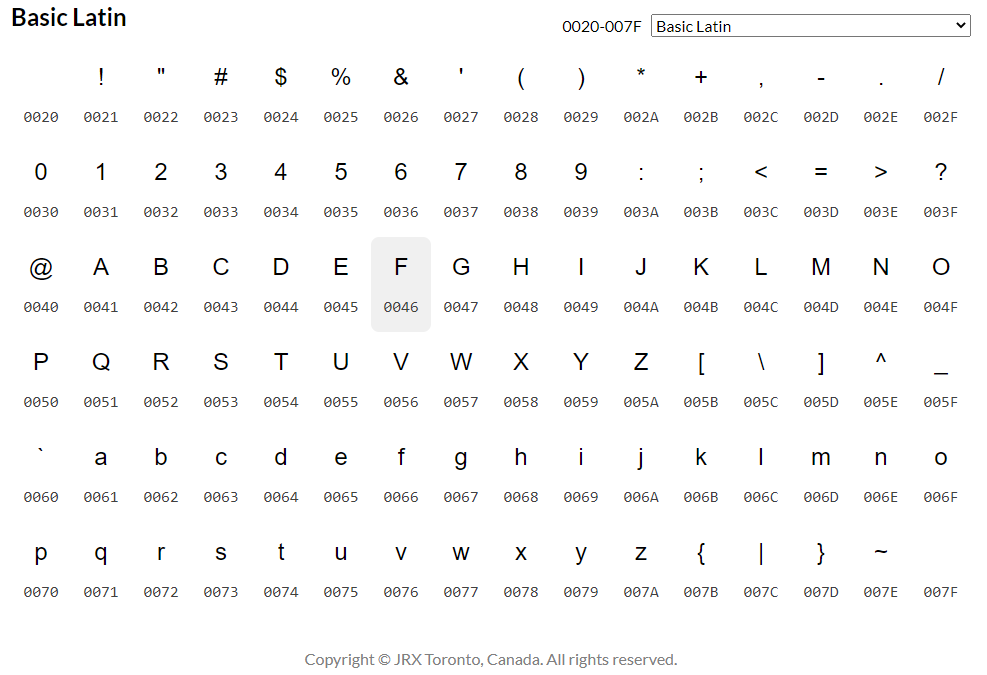

* hello world에 해당하는 유니코드들이 올바르게 표시 되었음을 확인할 수 있습니다.
* 위와 같이 해당하는 언어들의 유니코드 범위를 안다면, 쉽게 다양한 언어들을 구별 할 수 있습니다.

3. 유니코드 활용
* 이번 장에서는 10진수, 16진수, ord()함수를 이용해 다양한 언어로 구성된 hello world 문장 속에서 특정 언어를 제거해 보도록 하겠습니다.

In [3]:
def remove_language(range_s, range_e, sentence):

    a = int(range_s, 16) #16진수 -> 10진수 변환
    b = int(range_e, 16)

    return_sentence = ''

    for i,w in enumerate(sentence):

        if a <= ord(w) and ord(w) <= b: #음절 단위로 사전에 정의한 유니코드 범위 내에 존재하는가
            continue

        return_sentence += w

    return return_sentence

In [4]:
sentence = 'hello world 안녕하세요 세계 مرحبا بالعالم  Hallo Welt Chào thế giới Привет, мир'
# 영어 한국어 아랍어 독일어 베트남어 러시아어
# 구글번역기 이용
print(sentence)

hello world 안녕하세요 세계 مرحبا بالعالم  Hallo Welt Chào thế giới Привет, мир


In [5]:
print(remove_language('0600', '06FF', sentence)) #아랍어 제거, 아랍어의 유니코드 범위 0600 ~ 06FF

hello world 안녕하세요 세계    Hallo Welt Chào thế giới Привет, мир


In [6]:
print(remove_language('0400', '04FF', sentence)) #러시아어 제거, 러시아 키릴 문자의 유니코드 범위 0400 ~ 04FF

hello world 안녕하세요 세계 مرحبا بالعالم  Hallo Welt Chào thế giới , 


* 영어를 제거하려면 어떻게 해야할까?
* 위에서 소개한 유니코드 사이트에서 Basic Latin 0020 ~ 007F 범위에 대소문자 알파벳이 있음을 알 수 있다.

In [7]:
print(remove_language('0020','007F',sentence)) # 알파벳 제거, 알파벳의 유니코드 범위 0020 ~ 007F

안녕하세요세계مرحبابالعالمàếớПриветмир


* 주의해야할 점을 눈치 채셨나요?
* 먼저 영어, 독일어, 베트남어 일부는 같은 유니코드 체계를 이용해 표현됩니다.
* 두번째로, 유니코드 범위에 공백을 표현하는 유니코드가 속해 있을 수 있어, 원하지 않게 띄어쓰기를 제거하게 됩니다.
* 이런 점들을 고려해, 독립된 유니코드를 사용하는 언어인지, 유니코드에서 띄어쓰기 혹은 특수문자들에 대해서도 원하는 목적을 위해 적절히 예외처리를 해주셔야합니다.